# Packaging and presentation

Short explanation of the dataset: 
- __outlet_id__: The ID of a outlet/market
- __country__: The country in which the outlet is located
- __brand__: "MediaMarkt" or "Saturn"
- __customers_per_day__: The number of customers per day in this outlet 
- __sales_per_day__: The amount of sales for a specific outlet on a specific day
- __currency__: The currency of __sales_per_day__
- __week_id__: Calendar week 
- __weekday__: mon = Monday, tue = Tuesday, ... , sun = Sunday

In [1]:
import pandas as pd 

data_path = 'data.csv' # maybe you have to modify this... 
data = pd.read_csv(data_path, sep=';')
print(data.head())

        brand  country currency  customers_per_day  outlet_id  week_id  \
0  MediaMarkt    spain     EURO             3138.0      100.0     34.0   
1      Saturn  germany     EURO              378.0       86.0      8.0   
2  MediaMarkt    italy     EURO              379.0      530.0     28.0   
3      Saturn  germany     EURO             3050.0       17.0     47.0   
4  MediaMarkt    spain     EURO              548.0      164.0      7.0   

  weekday  sales_per_day  
0     sat       72169.14  
1     mon       52825.62  
2     thu       53309.83  
3     sat       74237.45  
4     tue       56621.61  


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
data_path = 'data.csv'
mydf = pd.read_csv(data_path, sep=';')

In [3]:
mean1 = mydf['customers_per_day'].mean()
mean2 = mydf['sales_per_day'].mean()
sum = mydf.groupby('country')[['sales_per_day']].sum()
max = mydf['sales_per_day'].max()
count = mydf['sales_per_day'].count()
median = mydf['sales_per_day'].median()
variance = mydf['sales_per_day'].var()
std = mydf['sales_per_day'].std()
uniqueness = mydf['week_id'].unique()

In [4]:
mydf['sales_per_day'].describe()

count     18193.000000
mean      50823.378059
std       31283.133925
min     -999999.000000
25%       51260.450000
50%       57319.920000
75%       63163.580000
max       96225.530000
Name: sales_per_day, dtype: float64

In [5]:
mydf.dtypes

brand                 object
country               object
currency              object
customers_per_day    float64
outlet_id            float64
week_id              float64
weekday               object
sales_per_day        float64
dtype: object

In [6]:
dailysales = mydf[['country','customers_per_day','sales_per_day']]
dailysales.head()

,country,customers_per_day,sales_per_day
0,spain,3138.0,72169.14
1,germany,378.0,52825.62
2,italy,379.0,53309.83
3,germany,3050.0,74237.45
4,spain,548.0,56621.61


In [7]:
groupedsales = dailysales.groupby('country')
groupedsales.size()

country
austria        2496
germany        4995
greece         2141
italy          2852
netherlands    2137
spain          2495
switzerland    1069
dtype: int64

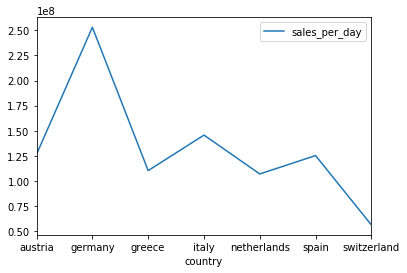

In [8]:
import numpy as np
import pandas as pd

grandsales = mydf[['country','sales_per_day']].groupby('country').aggregate(np.sum)
grandsales.plot()